# **Прогнозирование оттока клиентов**
Проект для курса "Прикладная наука о данных"

Выполнили: Бобров Валерий, Гришкина Анна, Милицына Полина, Мороз Екатерина, Соболева Татьяна, Шпилёва Лина

За основу взят датасет из Kaggle соревнования [Bank Churn Competition by IPII HSExMTS](https://www.kaggle.com/competitions/bank-churn-competition-by-ipii-hs-ex-mts)

## **Описание датасета**


*   **Customer ID**: Уникальный идентификатор каждого клиента.
*   **Surname**: Фамилия клиента.
*   **Credit Score**: Числовое значение, представляющее кредитный рейтинг клиента
*   **Geography**: Страна проживания клиента (Франция, Испания или Германия).
*   **Gender**: Пол клиента (Мужской или Женский).
*   **Age**: Возраст клиента.
*   **Tenure**: Количество лет, которое клиент обслуживается в банке.
*   **Balance**: Баланс на счёте клиента.
*   **NumOfProducts**: Количество банковских продуктов, которыми пользуется клиент (например, сберегательный счёт, кредитная карта).
*   **HasCrCard**: Наличие кредитной карты у клиента (1 = да, 0 = нет).
*   **IsActiveMember**: Является ли клиент активным членом банка (1 = да, 0 = нет).
*   **EstimatedSalary**: Предполагаемая заработная плата клиента.
*   **Exited**: Ушёл ли клиент (1 = да, 0 = нет).

## **Подготовка**

In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

import kagglehub

# Download latest version
path = kagglehub.dataset_download("linashpileva/competition-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'competition-dataset' dataset.
Path to dataset files: /kaggle/input/competition-dataset


In [ ]:
# filePath = '/content/drive/MyDrive/train.csv'
# df_train = pd.read_csv(filePath)

# Находим нужный нам файл train в папке
train_file = os.path.join(path, "train.csv")

# Загружаем данные в DataFrame
df_train = pd.read_csv(train_file)

print(df_train.head())

   id  CustomerId         Surname  CreditScore Geography  Gender   Age  \
0   0  15752626.0          Martin        675.0    France  Female  48.0   
1   1  15797960.0        Pagnotto        673.0    France  Female  37.0   
2   2  15672056.0            T'an        607.0    France    Male  29.0   
3   3  15733169.0  Chukwufumnanya        669.0    France  Female  28.0   
4   4  15795519.0           Hsing        743.0    France    Male  24.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     7.0  143582.89            2.0        0.0             0.0   
1     7.0       0.00            2.0        0.0             0.0   
2     4.0       0.00            2.0        0.0             1.0   
3     2.0       0.00            2.0        1.0             0.0   
4     7.0       0.00            2.0        1.0             0.0   

   EstimatedSalary  Exited  
0         93844.82     1.0  
1        170980.86     0.0  
2         61290.99     0.0  
3         97734.30     0.0  
4        1808

In [ ]:
#Настройки визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['font.size'] = 12

## **Исследовательский анализ данных (EDA)**

In [ ]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15752626.0,Martin,675.0,France,Female,48.0,7.0,143582.89,2.0,0.0,0.0,93844.82,1.0
1,1,15797960.0,Pagnotto,673.0,France,Female,37.0,7.0,0.00,2.0,0.0,0.0,170980.86,0.0
2,2,15672056.0,T'an,607.0,France,Male,29.0,4.0,0.00,2.0,0.0,1.0,61290.99,0.0
3,3,15733169.0,Chukwufumnanya,669.0,France,Female,28.0,2.0,0.00,2.0,1.0,0.0,97734.30,0.0
4,4,15795519.0,Hsing,743.0,France,Male,24.0,7.0,0.00,2.0,1.0,0.0,180800.42,0.0


### Первичный анализ

In [ ]:
print("\nИнформация о данных:")
display(df_train.info())

print("\nСтатистика числовых переменных:")
display(df_train.describe())

print("\nСтатистика категориальных переменных:")
display(df_train.describe(include=['object']))


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


None


Статистика числовых переменных:


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.569136e+07,658.223400,37.850067,5.03080,42636.168488,1.585733,0.779933,0.494400,117924.109015,0.201133
std,4330.271354,1.355762e+05,72.851215,8.185959,2.80209,59570.493235,0.529026,0.414305,0.499985,45698.606770,0.400861
min,0.000000,1.574723e+06,437.000000,18.000000,0.00000,0.000000,1.000000,0.000000,0.000000,11.570000,0.000000
25%,3749.750000,1.563450e+07,601.000000,32.000000,3.00000,0.000000,1.000000,1.000000,0.000000,83419.440000,0.000000
50%,7499.500000,1.568965e+07,660.000000,37.000000,5.00000,0.000000,2.000000,1.000000,0.000000,123475.880000,0.000000
75%,11249.250000,1.575781e+07,708.000000,42.000000,7.00000,109079.755000,2.000000,1.000000,1.000000,157564.750000,0.000000
max,14999.000000,1.581567e+07,850.000000,72.000000,20.00000,187911.550000,4.000000,1.000000,1.000000,199953.330000,1.000000



Статистика категориальных переменных:


,Surname,Geography,Gender
count,15000,15000,15000
unique,778,3,2
top,Ch'iu,France,Male
freq,278,9002,8424


### Анализ пропущенных значений

In [ ]:
print("Пропусков в данных:", df_train.isnull().sum().sum())

Пропусков в данных: 0


Пропущенных значений нет, работа с пропущенными значениями не требуется

### Типы переменных

In [ ]:
target_col = 'Exited'
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_cols = ['Geography', 'Surname', 'Gender', 'HasCrCard', 'IsActiveMember']

### Анализ целевой переменной

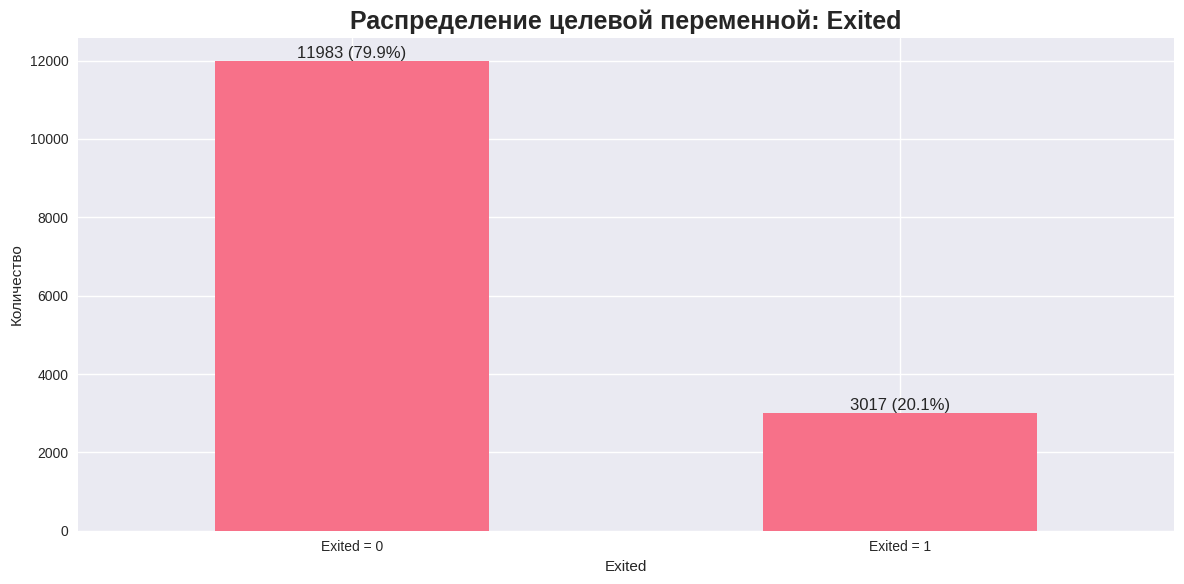

In [ ]:
counts = df_train['Exited'].value_counts()
total = len(df_train)

ax = counts.plot(kind='bar', figsize=(12,6))
plt.title('Распределение целевой переменной: Exited', fontsize=18, fontweight='bold')
plt.ylabel('Количество')
plt.xticks([0,1], ['Exited = 0', 'Exited = 1'], rotation=0)

for i, count in enumerate(counts):
    ax.text(i, count, f'{count} ({count/total*100:.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Наблюдается дисбаланс классов целевой переменной (80% - 20%)

### Анализ распределений числовых переменных

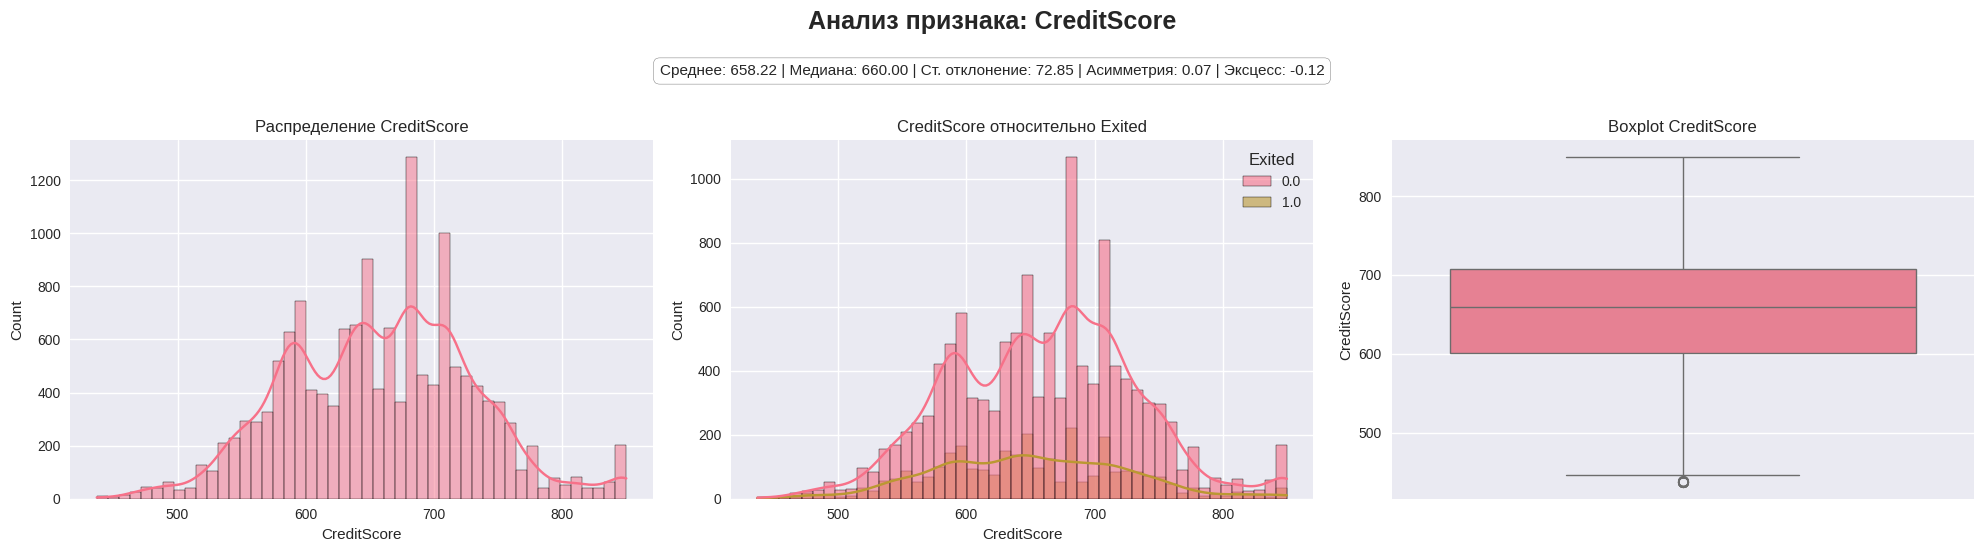

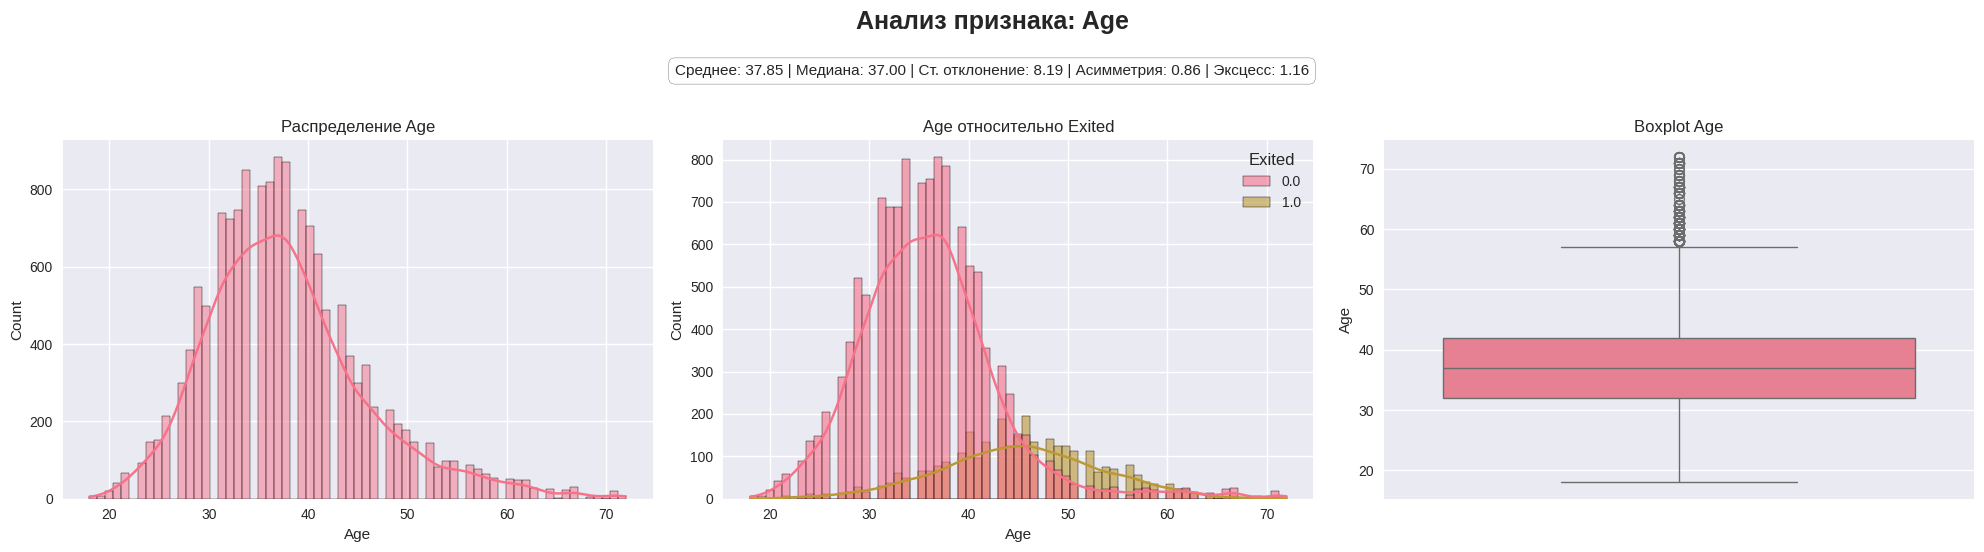

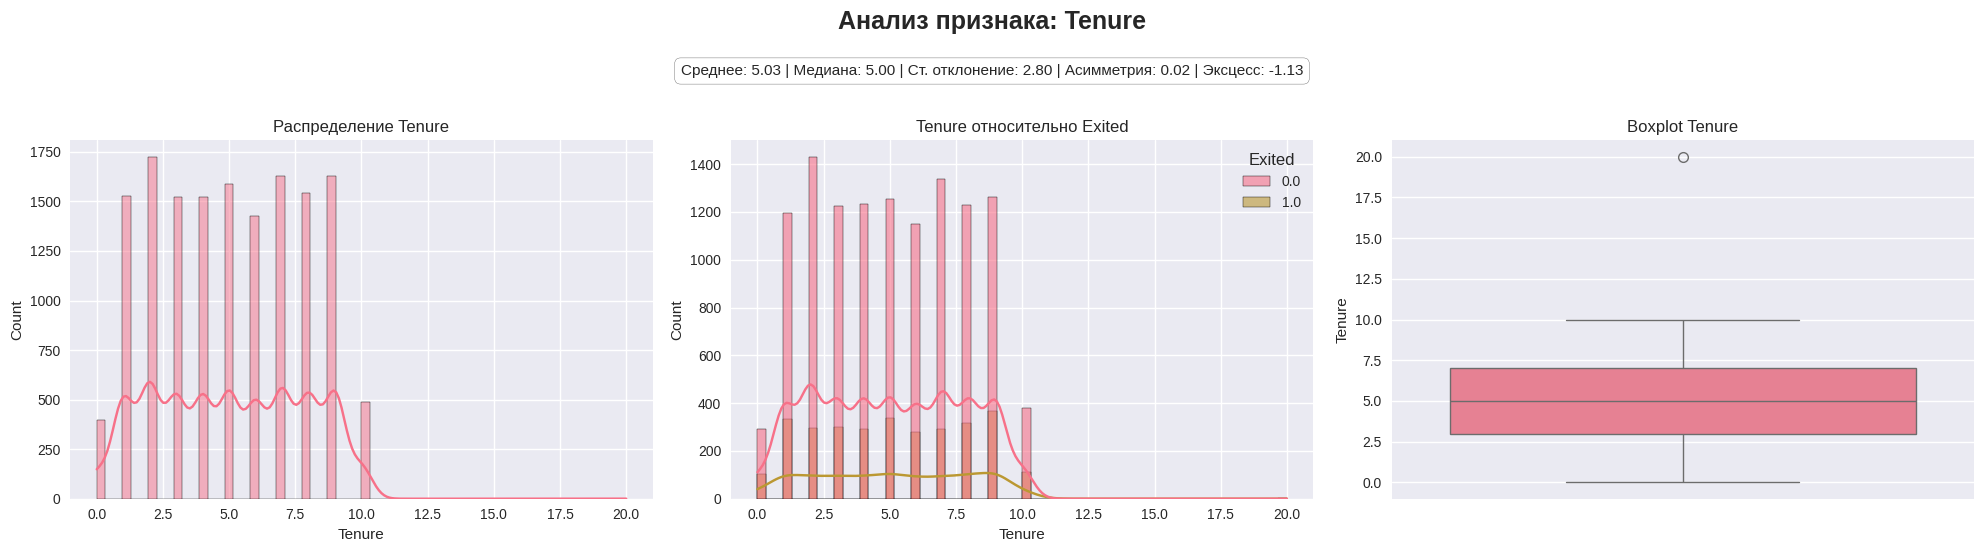

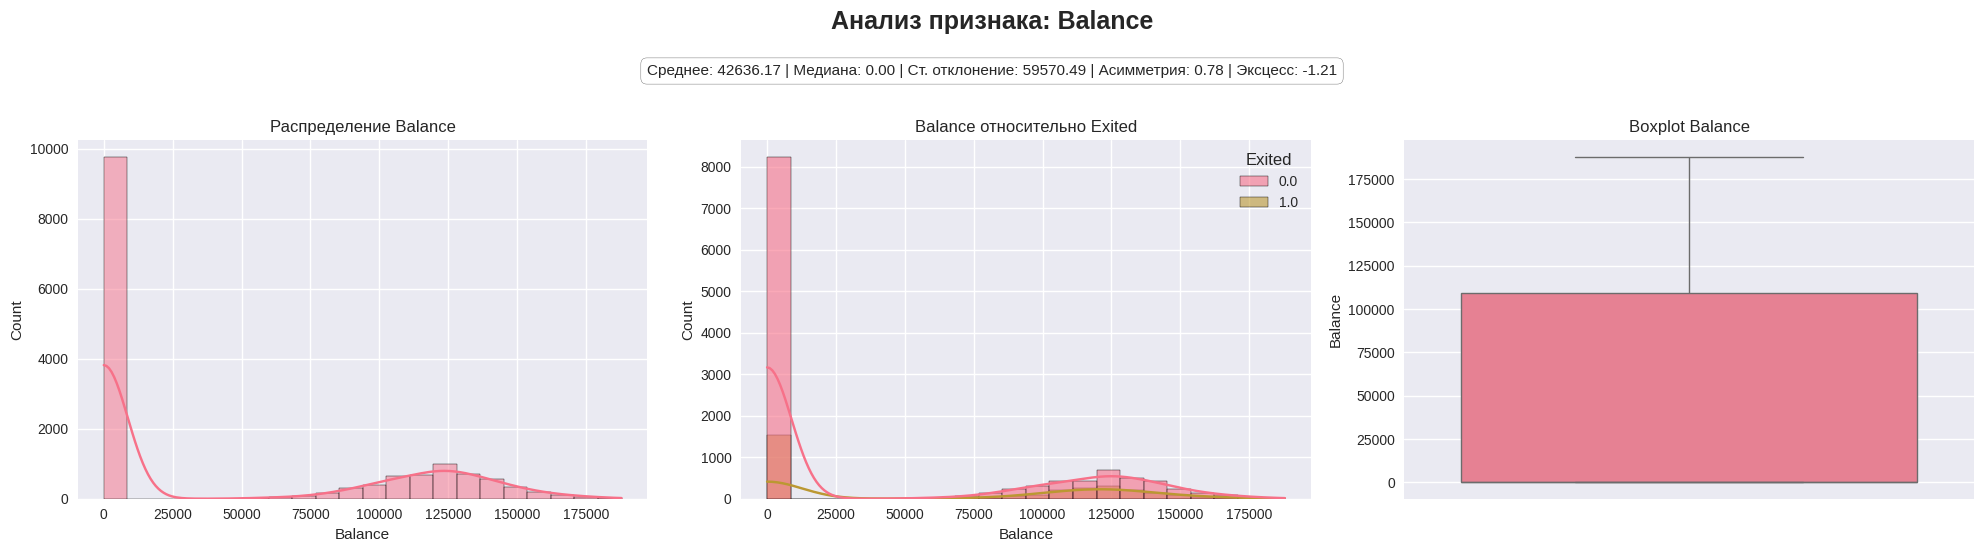

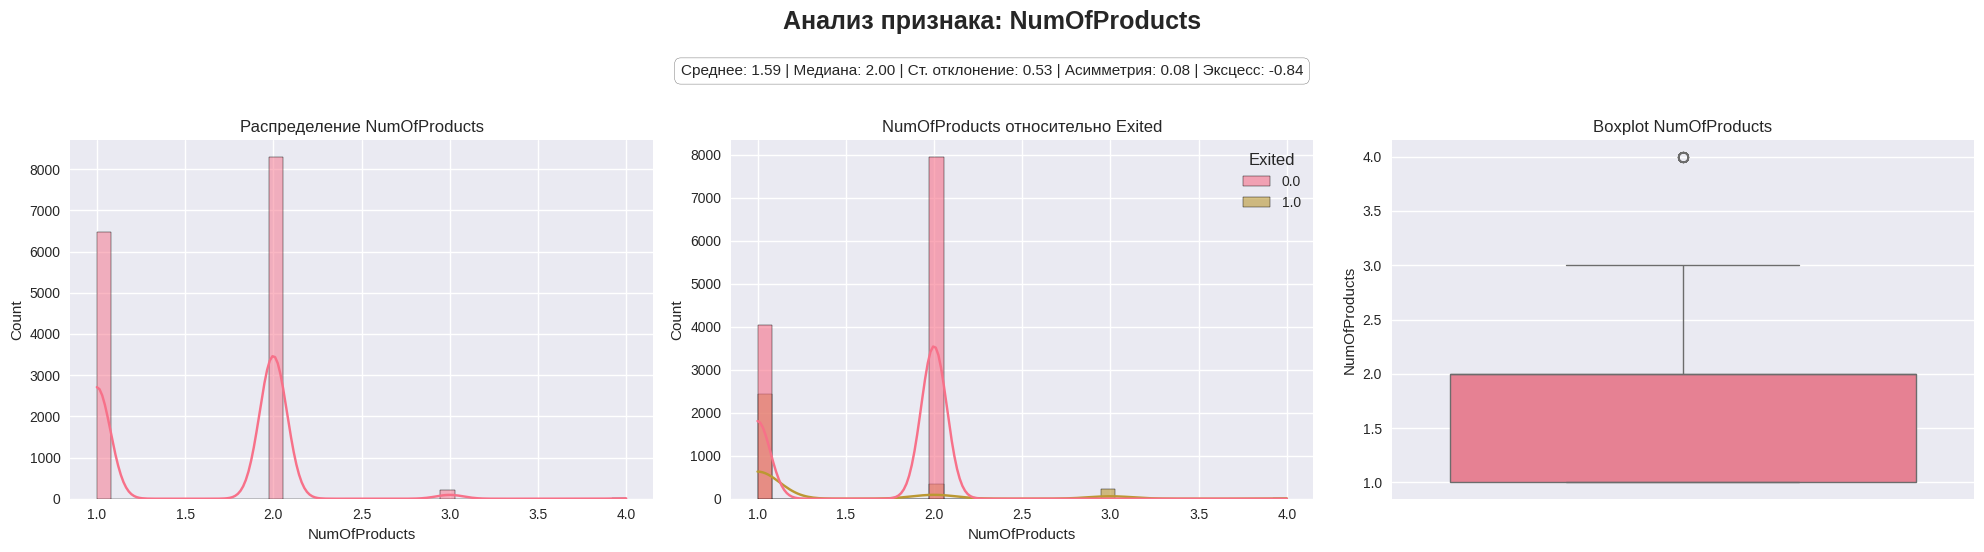

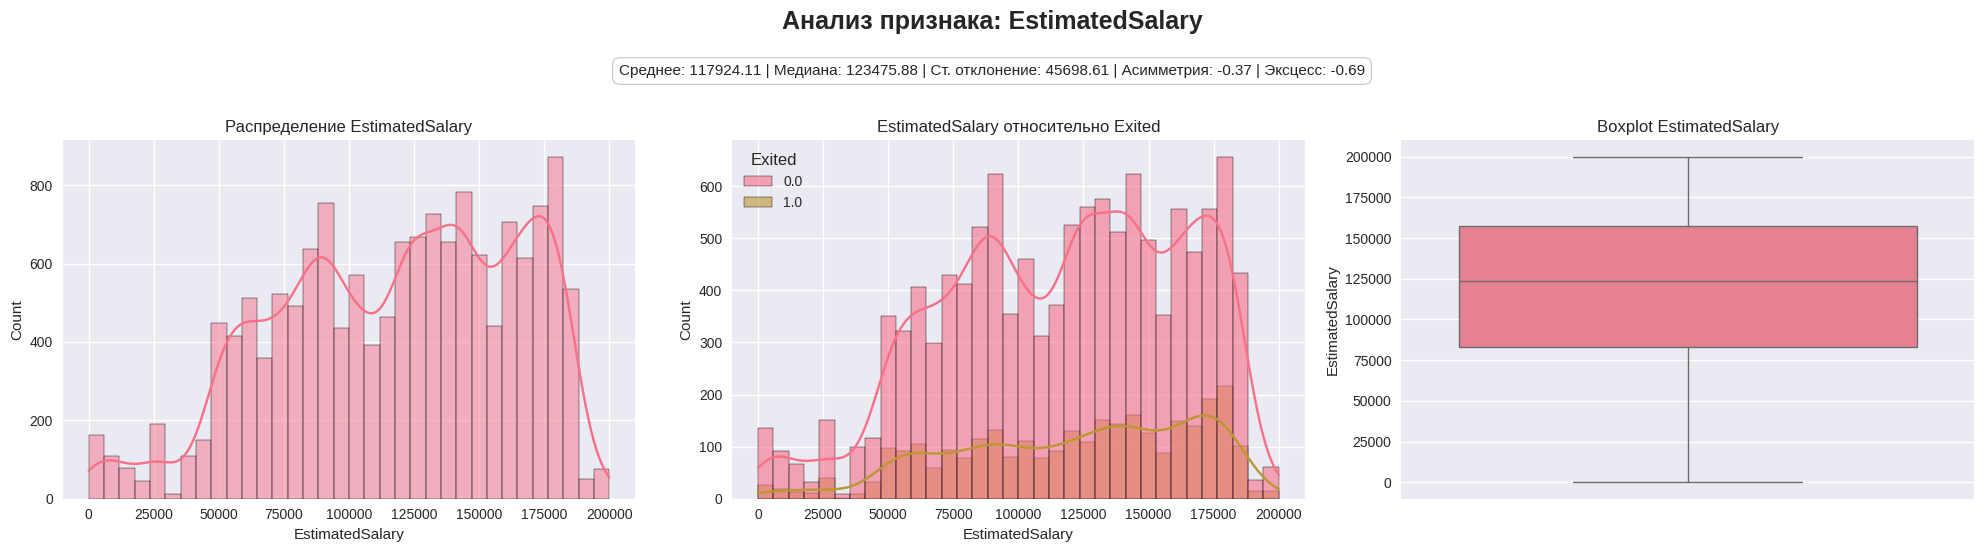

In [ ]:
for col in numerical_cols:

    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    sns.histplot(df_train[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Распределение {col}')

    sns.histplot(data=df_train, x=col, hue='Exited', kde=True, ax=axes[1], alpha=0.6)
    axes[1].set_title(f'{col} относительно Exited')

    sns.boxplot(y=df_train[col], ax=axes[2])
    axes[2].set_title(f'Boxplot {col}')

    plt.suptitle(f'Анализ признака: {col}', fontsize=18, fontweight='bold', y=1.10)

    stats_text = (
        f"Среднее: {df_train[col].mean():.2f} | "
        f"Медиана: {df_train[col].median():.2f} | "
        f"Ст. отклонение: {df_train[col].std():.2f} | "
        f"Асимметрия: {df_train[col].skew():.2f} | "
        f"Эксцесс: {df_train[col].kurtosis():.2f}"
    )

    fig.text(0.5, 0.97, stats_text, ha='center', fontsize=11,
             bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.4'))

    plt.tight_layout()
    plt.show()

Изучив визуализации можно сделать некоторые гипотезы:

*   Взрослые клиенты (45+) чаще уходят из банка. Возможно это связано с изменением финансовых привычек и поиском лучших условий для формирования пенсионных накоплений. Другая возможная причина - сервис банка, ориентированный на более молодую аудиторию.
*   Клиенты в основном используют 1-2 продукта, более 2-х продуктов у одного клиента - редкость. Высокий отток наблюдается среди тех, кто имеет 1 продукт или больше 2-х продуктов.
Возможно, низкая вовлечённость делает менее лояльными и более склонными к смене банка, тех кто пользуется одним продуктом. Те, кто пользуется более чем двумя продуктами, могут сталкиваться с сложностью и неудобством управления своим портфелем, что также повышает вероятность ухода.



### Анализ категориальных переменных

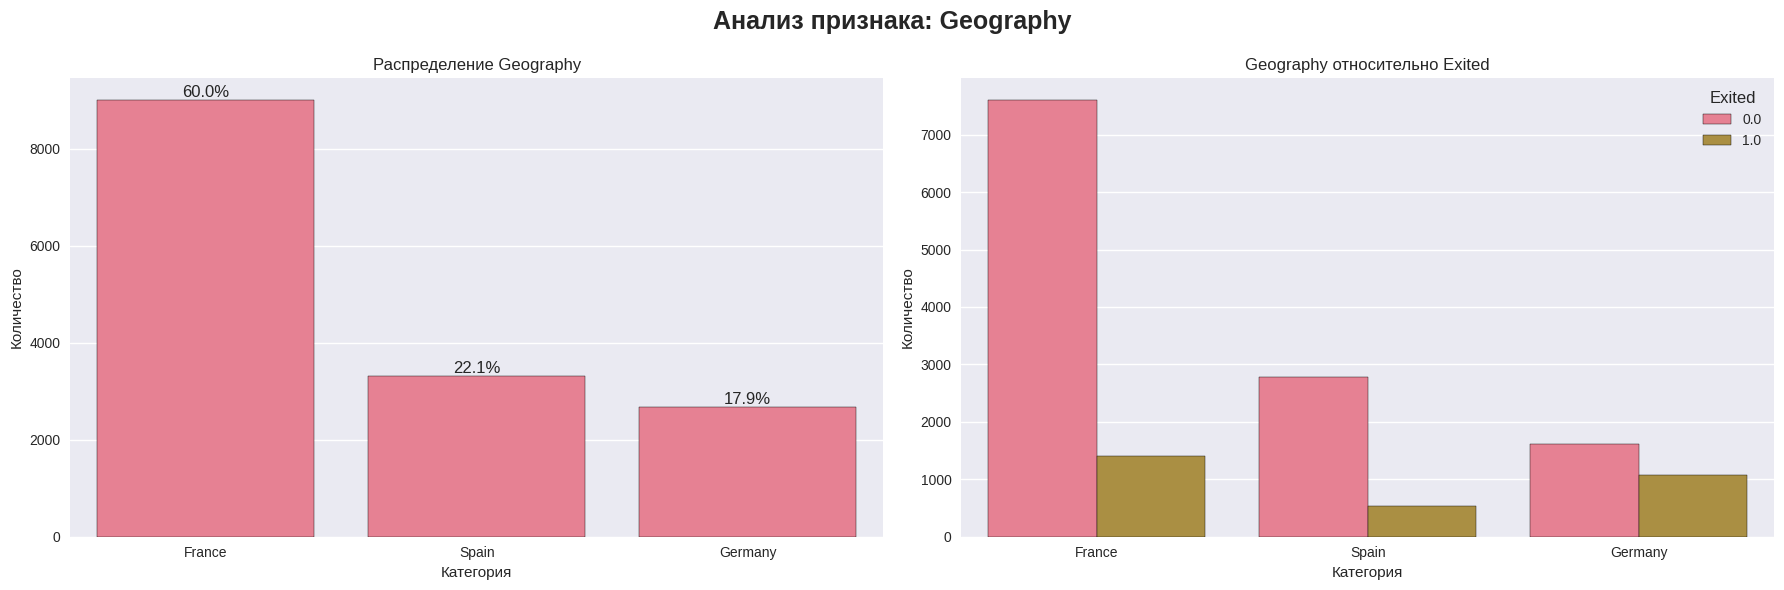

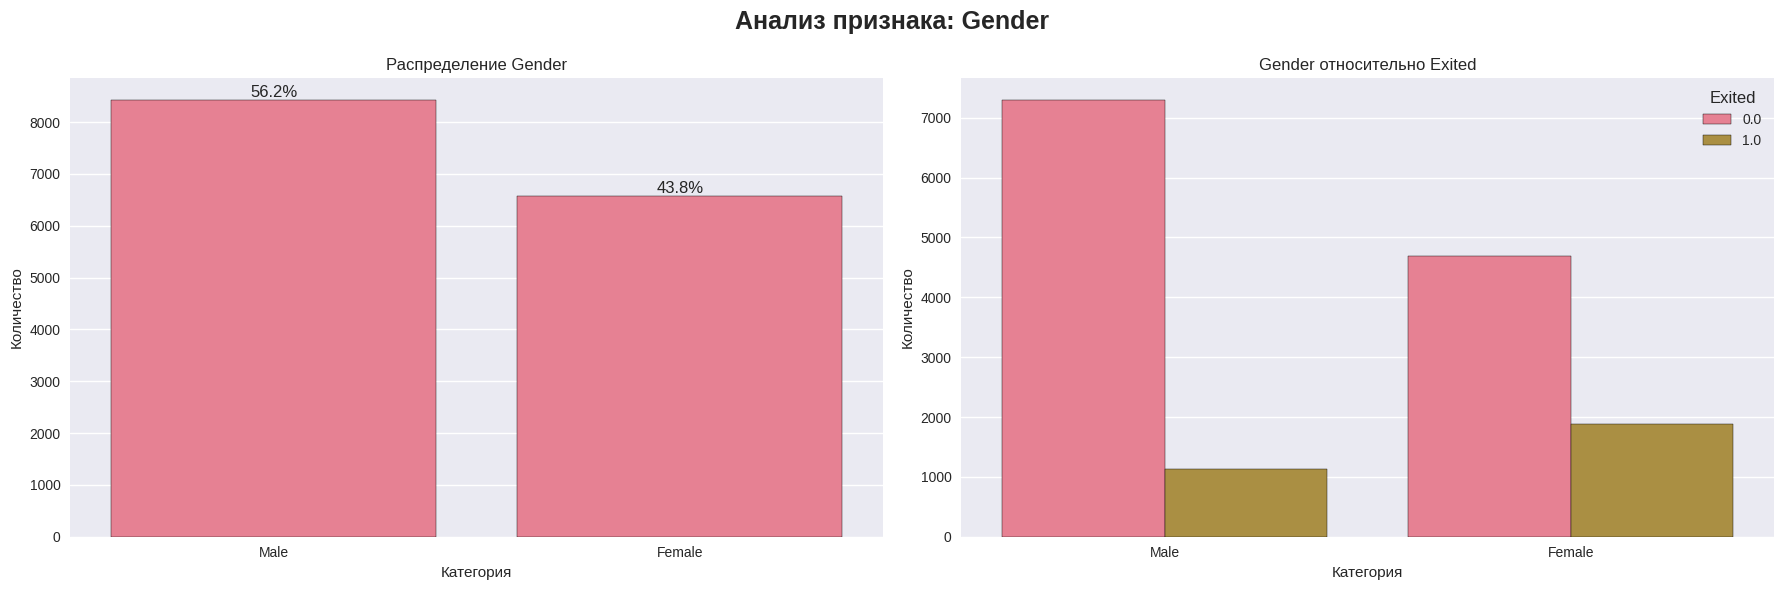

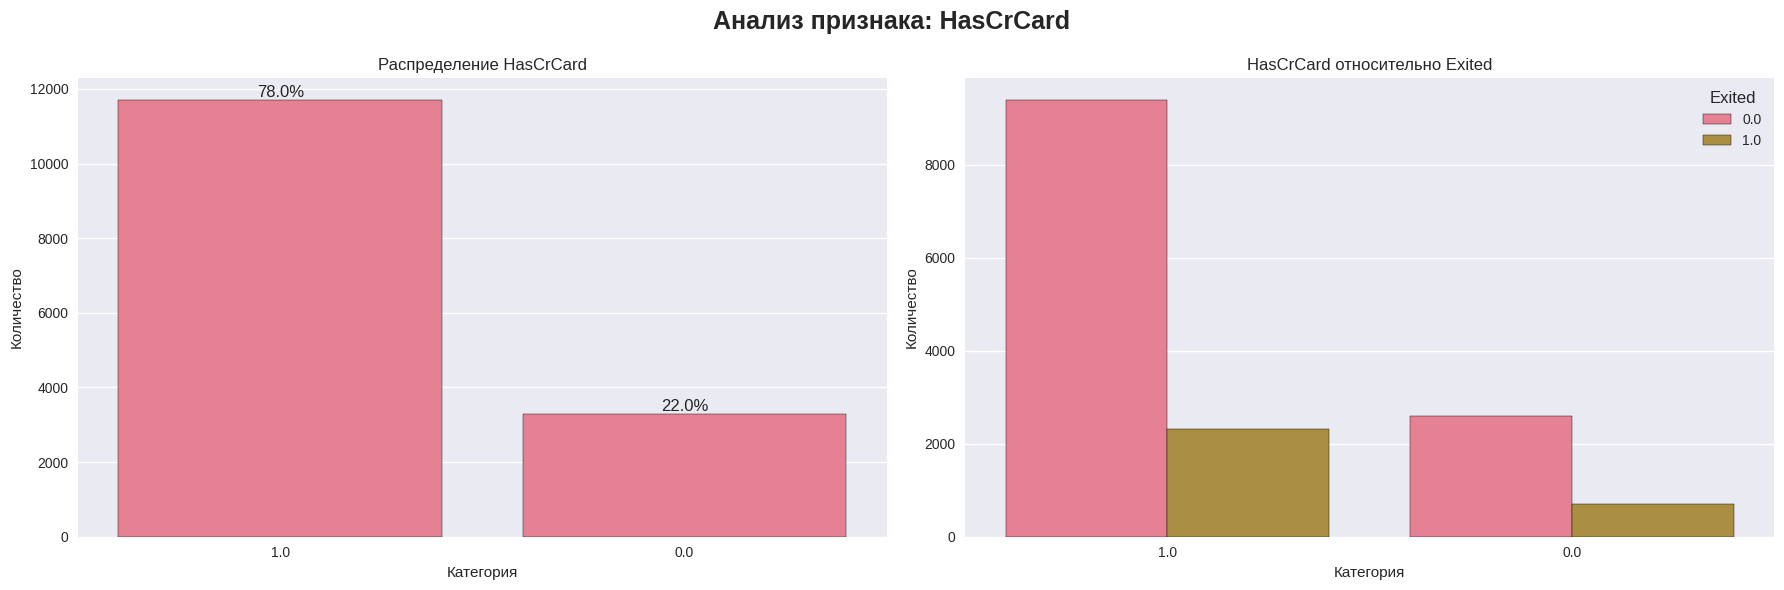

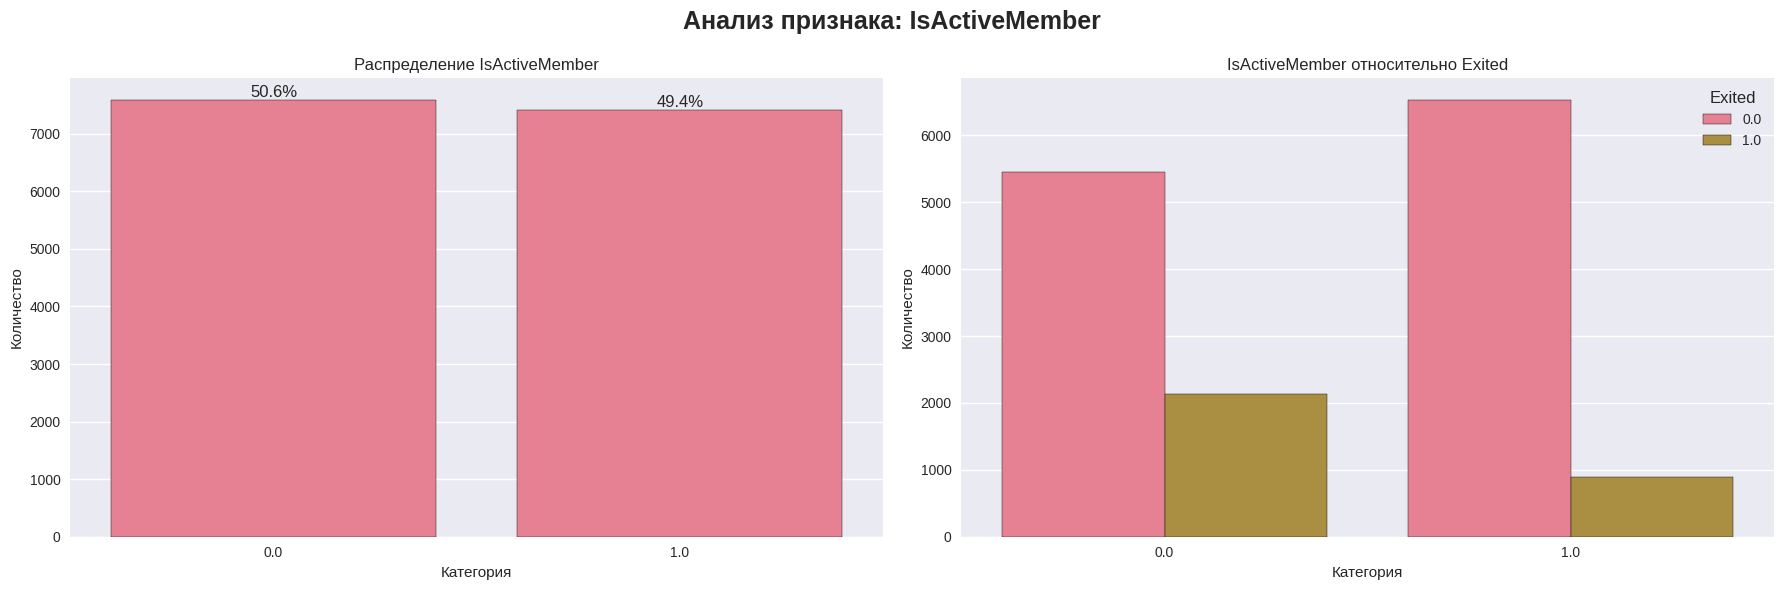

In [ ]:
for col in categorical_cols:

    if col == "Surname":
        continue

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    ax1 = sns.countplot(x=df_train[col], order=df_train[col].value_counts().index, edgecolor='black', ax=axes[0])
    axes[0].set_title(f'Распределение {col}')
    axes[0].set_xlabel('Категория')
    axes[0].set_ylabel('Количество')

    total = len(df_train)
    axes[0].bar_label(axes[0].containers[0], labels=[f'{h/total*100:.1f}%' for h in axes[0].containers[0].datavalues])

    ax2 = sns.countplot(data=df_train, x=col, hue='Exited', order=df_train[col].value_counts().index,edgecolor='black', ax=axes[1])
    axes[1].set_title(f'{col} относительно Exited')
    axes[1].set_xlabel('Категория')
    axes[1].set_ylabel('Количество')

    plt.suptitle(f'Анализ признака: {col}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

Визуализация категориальных признаков позволяет выявить самые явные закономерности:

*   Отток среди женщин значительно выше чем среди мужчин, что может быть связано с гендерными различиями в финансовом поведении и чувствительности к качеству банковских услуг
*   Среди стран наиболее высокий уровень оттока наблюдается в Германии. Возможно, рынок в Германии более конкурентный, и клиенты легче меняют банк. Или же клиенты в Германии могут быть более требовательными к финансовым условиям и уровню сервиса




### Анализ корреляций

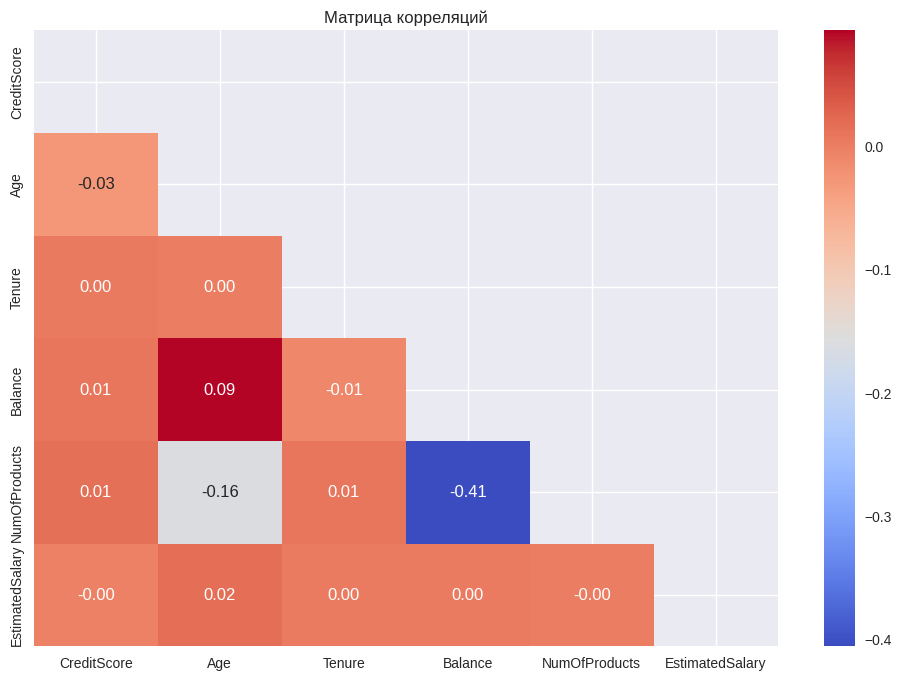

In [ ]:
corr = df_train[numerical_cols].corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

strong_corrs = [
    (c1, c2, corr.loc[c1, c2])
    for c1 in corr.columns for c2 in corr.columns
    if c1 != c2 and abs(corr.loc[c1, c2]) > 0.7
]
if strong_corrs:
    print("Сильные корреляции (|r| > 0.7):")
    for c1, c2, r in strong_corrs:
        print(f"{c1} - {c2}: {r:.2f}")

**Корреляция с целевой переменной** наблюдается у **Age** (0.45), **NumOfProducts** (-0.29), **IsActiveMember** (-0.20), **Balance** (0.15)


Также наблюдается **корреляция между парами признаков** **Balance** и **NumOfProducts** (-0.41) и **Age** и **NumOfProducts** (-0.16)


Вероятно, имеют место **нелинейные зависимости между переменными**

### Поиск выбросов (IQR)

In [ ]:
for col in numerical_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_train[(df_train[col] < lower) | (df_train[col] > upper)]
    print(f"{col}: {len(outliers)} выбросов ({len(outliers)/len(df_train)*100:.2f}%)")

CreditScore: 9 выбросов (0.06%)
Age: 414 выбросов (2.76%)
Tenure: 1 выбросов (0.01%)
Balance: 0 выбросов (0.00%)
NumOfProducts: 19 выбросов (0.13%)
EstimatedSalary: 0 выбросов (0.00%)


Согласно методу IQR в данных присутствует около 3% выбросов по переменной Age

# **Feature Engineering**




In [ ]:
!pip install optuna

In [ ]:
!pip install -- update xgboost
!pip install -- update lightgbm
!pip install -- update catboost

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import gc
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

In [ ]:
#Загрузим даннные по тестовой и тренировочной выборке в отдельные датасеты:

#Сформируем пути к нашим файлам внутри папки
train_file = os.path.join(path, "train.csv")
test_file = os.path.join(path, "test.csv")

#Загрузм данные в датафрейм
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
test_1 = pd.read_csv(test_file)


test_id = test['id']

drop_cols = ['id', 'CustomerId', 'Surname']
train.drop(columns=drop_cols, inplace=True)
test.drop(columns=drop_cols, inplace=True)

#Исключим из рассмотрения выбросы - по 1% наибольших и наименьших значений:
num_cols_for_winsor = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'NumOfProducts']
for col in num_cols_for_winsor:
    lower = train[col].quantile(0.01)
    upper = train[col].quantile(0.99)
    train[col] = train[col].clip(lower, upper)
    test[col] = test[col].clip(lower, upper)

#Сделаем биннинг ключевых признаков:
bin_cols = ['CreditScore', 'Age', 'Balance']
for col in bin_cols:
    bins = pd.qcut(train[col], q=10, duplicates='drop', retbins=True)[1]
    train[col+'_bin'] = pd.cut(train[col], bins=bins, include_lowest=True, labels=False)
    test[col+'_bin'] = pd.cut(test[col], bins=bins, include_lowest=True, labels=False)

#Затем создадим комбинированные признаки на основе биннинга:
for df in [train, test]:
    df['Geography_Gender'] = df['Geography'] + '_' + df['Gender']
    df['Geography_Age_bin'] = df['Geography'] + '_' + df['Age_bin'].astype(str)
    df['Gender_Age_bin'] = df['Gender'] + '_' + df['Age_bin'].astype(str)
    df['Geography_Gender_Age_bin'] = df['Geography_Gender'] + '_' + df['Age_bin'].astype(str)

#И прочие комбинации:
    df['CreditScore_Balance'] = df['CreditScore'] * df['Balance']
    df['Age_NumProducts'] = df['Age'] * df['NumOfProducts']
    df['Balance_per_Salary'] = df['Balance'] / (df['EstimatedSalary'] + 1)
    df['CreditScore_per_Age'] = df['CreditScore'] / (df['Age'] + 1)

X = train.drop(columns=['Exited'])
y = train['Exited'].astype(int)

#Соберем итоговые списки признаков:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
            'HasCrCard', 'IsActiveMember', 'CreditScore_Balance', 'Age_NumProducts',
            'Balance_per_Salary', 'CreditScore_per_Age']

cat_cols = ['Geography', 'Gender', 'Geography_Gender', 'Geography_Age_bin',
            'Gender_Age_bin', 'Geography_Gender_Age_bin']

ref_df = train.copy()
ref_df['Exited'] = y

#На следующем шаге мы создадим функцию расширения списка признаков (без дубликатов):
def add_features(df, ref_df=None):
    df = df.copy()
#Логарифмируем значения баланса и заработных плат для достижения логнормального распределения:
    df['Log_Balance'] = np.log1p(np.abs(df['Balance']))
    df['Log_EstimatedSalary'] = np.log1p(df['EstimatedSalary'])
#И зададим новые комбинации признаков:
    df['Active_Balance'] = df['IsActiveMember'] * df['Balance']
    df['Products_per_Age'] = df['NumOfProducts'] / (df['Age'] + 1)
    df['CreditScore_Products'] = df['CreditScore'] * df['NumOfProducts']
    df['Tenure_Products'] = df['Tenure'] * df['NumOfProducts']
    df['Age_IsActive'] = df['Age'] * df['IsActiveMember']
    df['CreditScore_Age'] = df['CreditScore'] * df['Age']
    df['Log_Balance_Age'] = df['Log_Balance'] * df['Age']
    df['Log_Salary_Credit'] = df['Log_EstimatedSalary'] * df['CreditScore']

#Найдем групповые статистики (среднее арифметическое, стандартное отклонение и медиану) для всех категориальных кросс-признаков:
    group_cols = cat_cols
    if ref_df is not None:
        for gc in group_cols:
            if gc not in ref_df.columns:
                continue

            #Преобразуем в строки
            ref_df_temp = ref_df.copy()
            df_temp = df.copy()
            ref_df_temp[gc] = ref_df_temp[gc].astype(str)
            df_temp[gc] = df_temp[gc].astype(str)

            #Рассчитаем групповые статистики
            for agg in ['mean', 'std', 'median']:
                agg_name = f'Group_{gc}_Exited_{agg.capitalize()}'
                group = ref_df_temp.groupby(gc)['Exited'].agg(agg).reset_index()
                group.columns = [gc, agg_name]
                df = df.merge(group, on=gc, how='left')
                df[agg_name] = df[agg_name].fillna(0)

            #Найдем частоту для каждой категории:
            freq_name = f'Group_{gc}_Freq'
            freq = ref_df_temp[gc].value_counts(normalize=True).reset_index()
            freq.columns = [gc, freq_name]
            df = df.merge(freq, on=gc, how='left')
            df[freq_name] = df[freq_name].fillna(0)
    else:
        for gc in group_cols:
            for agg in ['Mean', 'Std', 'Median']:
                df[f'Group_{gc}_Exited_{agg}'] = 0
            df[f'Group_{gc}_Freq'] = 0

    return df


X = add_features(X, ref_df)

test = add_features(test, ref_df)

#Освободим память:
del ref_df
gc.collect()

#Далее, проведем таргет-энкодинг с уникальными именами
def target_encode_cv(train_df, test_df, col, target, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    train_encoded = pd.Series(index=train_df.index, dtype=float)
    for tr_idx, val_idx in skf.split(train_df, target):
        te = ce.TargetEncoder(cols=[col], smoothing=0.5)
        te.fit(train_df.iloc[tr_idx][[col]], target.iloc[tr_idx])
        train_encoded.iloc[val_idx] = te.transform(train_df.iloc[val_idx][[col]])[col]
    te = ce.TargetEncoder(cols=[col], smoothing=0.5)
    te.fit(train_df[[col]], target)
    test_encoded = te.transform(test_df[[col]])[col]
    return train_encoded, test_encoded

for c in cat_cols:
    X[f'TE_{c}'], test[f'TE_{c}'] = target_encode_cv(X, test, c, y)

cat_te_cols = [f'TE_{c}' for c in cat_cols]

#И сформируем финальный набор признаков:
new_feats = [
    'Log_Balance', 'Log_EstimatedSalary', 'Active_Balance', 'Products_per_Age',
    'CreditScore_Products', 'Tenure_Products', 'Age_IsActive', 'CreditScore_Age',
    'Log_Balance_Age', 'Log_Salary_Credit'
]

group_feats = [col for col in X.columns if col.startswith('Group_')]

feature_cols = num_cols + new_feats + group_feats + cat_te_cols

#Снова проверим, что все признаки уникальны
duplicates = set()
unique_features = []
for col in feature_cols:
    if col not in duplicates:
        unique_features.append(col)
        duplicates.add(col)

feature_cols = unique_features

print(f"Total features: {len(feature_cols)}")

X_feat = X[feature_cols].copy() #train датасет
test_feat = test[feature_cols].copy() #test датасет


Total features: 52


In [ ]:
#Проведем квантильно-ранговую нормализацию для приведения к нормальному распределению:
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=42)

#Преобразуем все числовые признаки
num_feats = X_feat.select_dtypes(include=['int', 'float']).columns
for col in num_feats:
    X_feat[col] = X_feat[col].astype('float32')
    test_feat[col] = test_feat[col].astype('float32')

X_trans = qt.fit_transform(X_feat).astype('float32')
test_trans = qt.transform(test_feat).astype('float32')

X_feat = pd.DataFrame(X_trans, columns=X_feat.columns, index=X_feat.index)
test_feat = pd.DataFrame(test_trans, columns=test_feat.columns, index=test_feat.index)

#Освободим память:
del X_trans, test_trans
gc.collect()


0

# **Model training**


Начнем с построения базовой модели CatBoost с использованием только характеристик из самого датасета и без подбора гиперпараметров.

Размер train: (12000, 8), test: (3000, 8)
Соотношение классов (neg/pos): 3.97
0:	learn: 0.6688281	total: 15.7ms	remaining: 15.7s
200:	learn: 0.3357128	total: 1.9s	remaining: 7.56s
400:	learn: 0.3108641	total: 2.91s	remaining: 4.35s
600:	learn: 0.2867290	total: 3.77s	remaining: 2.5s
800:	learn: 0.2684278	total: 4.62s	remaining: 1.15s
999:	learn: 0.2509095	total: 5.51s	remaining: 0us

Метрики модели:
Accuracy:  0.8570
Precision: 0.6056
Recall:    0.8275
F1-score:  0.6994
ROC-AUC:   0.9250


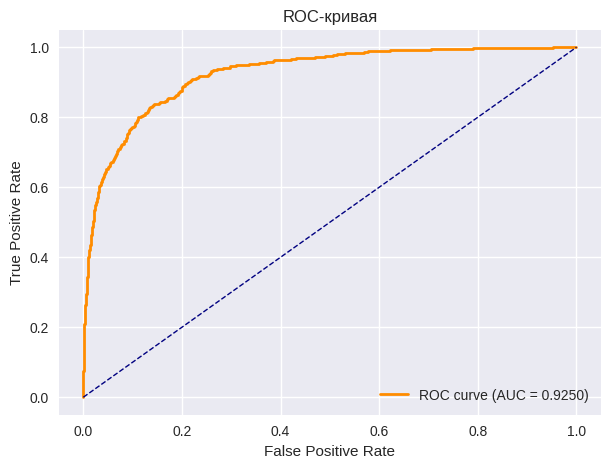

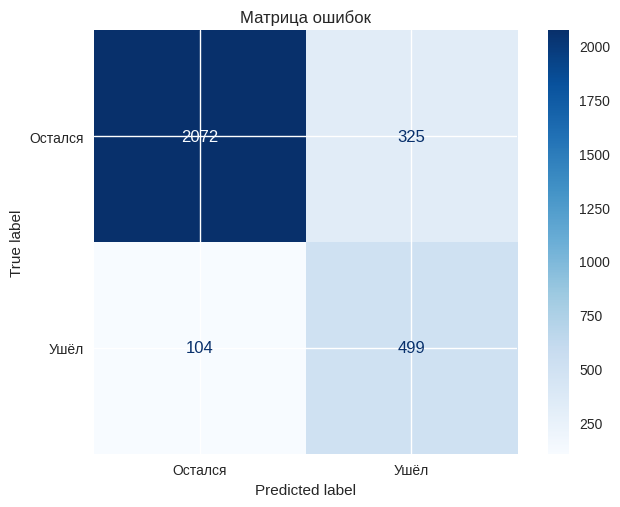

In [ ]:
#Cобираем датасет из изначальных параметров клиентов
X_clean = X_feat[['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember']]
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Размер train: {X_train.shape}, test: {X_test.shape}")
neg, pos = np.bincount(y_train.astype(int))
scale_pos_weight = neg / pos
print(f"Соотношение классов (neg/pos): {scale_pos_weight:.2f}")

#Запускаем обучение модели с зафиксированными гиперпараметрами
model_clean = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=3,
    random_seed=42,
    scale_pos_weight=scale_pos_weight,
    verbose=200
)

model_clean.fit(X_train, y_train)
#Определяем трешхолд предсказания
y_pred_proba = model_clean.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)
# считаем основные метрики модели (задачи классификации)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nМетрики модели:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")
#Считаем AUC и строим кривую ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Остался', 'Ушёл'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.show()

Теперь дополним базовую модель CatBoost нашими новыми фичами:

Размер train: (12000, 52), test: (3000, 52)
Соотношение классов (neg/pos): 3.97
0:	learn: 0.6698249	total: 11.4ms	remaining: 11.4s
200:	learn: 0.3033530	total: 1.78s	remaining: 7.07s
400:	learn: 0.2701824	total: 3.48s	remaining: 5.19s
600:	learn: 0.2389681	total: 5.17s	remaining: 3.44s
800:	learn: 0.2138448	total: 7.78s	remaining: 1.93s
999:	learn: 0.1925845	total: 9.82s	remaining: 0us

Метрики модели:
Accuracy:  0.8737
Precision: 0.6462
Recall:    0.8209
F1-score:  0.7232
ROC-AUC:   0.9334


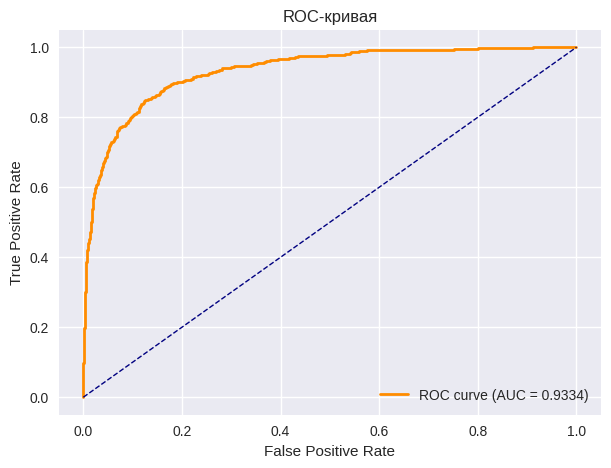

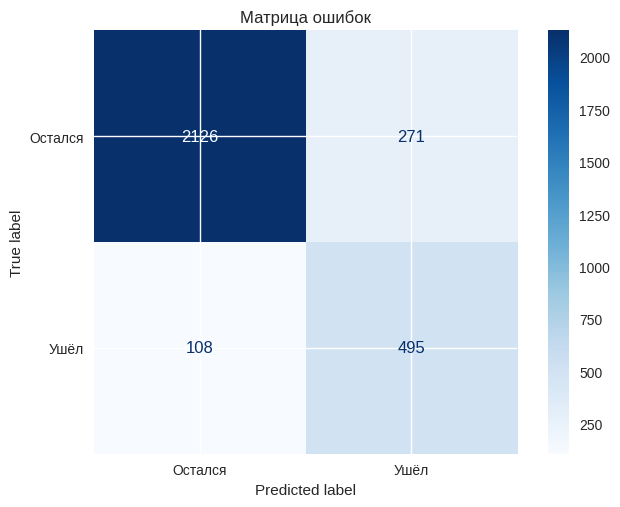

In [ ]:
#Берем уже полный датасет со всеми фичами X_feat
X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Размер train: {X_train.shape}, test: {X_test.shape}")

neg, pos = np.bincount(y_train.astype(int))
scale_pos_weight = neg / pos
print(f"Соотношение классов (neg/pos): {scale_pos_weight:.2f}")
#Запускаем CatBoost с фиксированными гиперпараметрами

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=3,
    random_seed=42,
    scale_pos_weight=scale_pos_weight,
    verbose=200
)

model.fit(X_train, y_train)
#Определяем трешхолд предсказания
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)
#Считаем основные метрики модели (задачи классификации)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nМетрики модели:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")
#Считаем AUC и строим кривую ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Остался', 'Ушёл'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.show()


Видим, что добавление новых фичей улучшает предсказательную способность модели:
- AUC растет на 0.01
- Precision - на 0.05
- Accuracy - на 0.02

Теперь добавим optuna, которая подберет нужные гиперпараметры CatBoost:

[I 2025-10-19 21:22:26,831] A new study created in memory with name: no-name-2481b6db-e9db-42e0-9745-eb64c6c61a3c


Размер train: (12000, 52), test: (3000, 52)
Соотношение классов (neg/pos): 3.97


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-19 21:22:35,364] Trial 0 finished with value: 0.9365140643604396 and parameters: {'learning_rate': 0.00595109697788345, 'depth': 7, 'l2_leaf_reg': 5.960465180286337, 'bagging_temperature': 0.4357413112918871, 'border_count': 42}. Best is trial 0 with value: 0.9365140643604396.
[I 2025-10-19 21:22:48,379] Trial 1 finished with value: 0.9367230043635251 and parameters: {'learning_rate': 0.005404021043796739, 'depth': 7, 'l2_leaf_reg': 7.3712663393342455, 'bagging_temperature': 0.6419753912306139, 'border_count': 173}. Best is trial 1 with value: 0.9367230043635251.
[I 2025-10-19 21:22:52,654] Trial 2 finished with value: 0.9375276309316994 and parameters: {'learning_rate': 0.03503216579717273, 'depth': 6, 'l2_leaf_reg': 9.001913595653551, 'bagging_temperature': 0.22108533628513527, 'border_count': 166}. Best is trial 2 with value: 0.9375276309316994.
[I 2025-10-19 21:22:54,135] Trial 3 finished with value: 0.9364455707832691 and parameters: {'learning_rate': 0.0588008217671333

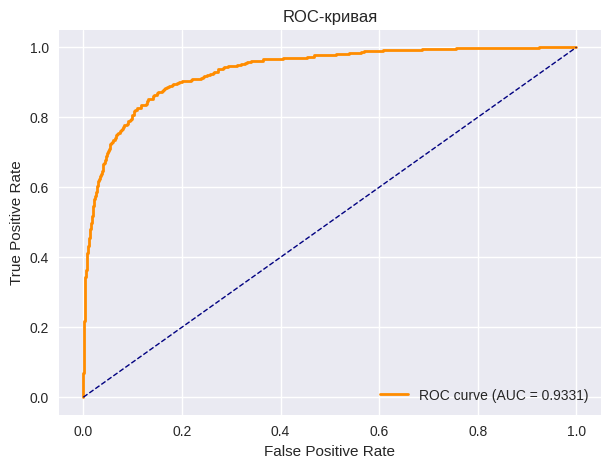

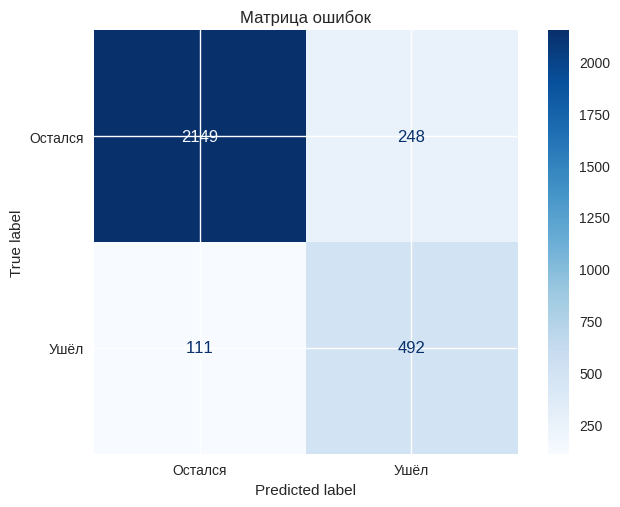

In [ ]:
#Импортируем оптьюну
import optuna

X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Размер train: {X_train.shape}, test: {X_test.shape}")

neg, pos = np.bincount(y_train.astype(int))
scale_pos_weight = neg / pos
print(f"Соотношение классов (neg/pos): {scale_pos_weight:.2f}")
#Запускаем функцию, которая будет обучать CatBoost с разными возможными параметрами и искать наилучшую с точки зрения ROC-AUC
def objective(trial):
    params = {
        'iterations': 1000,
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_seed': 42,
        'scale_pos_weight': scale_pos_weight,
        'verbose': 200
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=0)
    preds = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, preds)
    return auc
#Выводим полученный результат
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25, show_progress_bar=True)

print("\n Лучшие параметры:")
print(study.best_params)
print(f"Лучший ROC-AUC: {study.best_value:.4f}")
#Обучаем модель с лучшими гиперпараметрами
best_params = study.best_params
best_params.update({
    'iterations': 1500,
    'random_seed': 42,
    'scale_pos_weight': scale_pos_weight,
    'verbose': 200
})

model_opt = CatBoostClassifier(**best_params)
model_opt.fit(X_train, y_train)

y_pred_proba = model_opt.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)
#Считаем метрики качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n Метрики модели:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

#Считаем AUC и строим кривую ROC и визуализируем результаты
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Остался', 'Ушёл'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.show()


Далее добавим кросс-валидацию, чтобы увеличить качество предсказания благодаря большему использованию доступной выборки:

[I 2025-10-19 21:24:51,134] A new study created in memory with name: no-name-e832d1eb-5592-485f-94fa-f76a02b7a819


Размер train: (12000, 52), test: (3000, 52)
Соотношение классов (neg/pos): 3.97


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-10-19 21:24:54,716] Trial 0 finished with value: 0.9307465933615289 and parameters: {'learning_rate': 0.04171201920602355, 'depth': 5, 'l2_leaf_reg': 5.0166243904030905, 'bagging_temperature': 0.19485125110639534, 'border_count': 144}. Best is trial 0 with value: 0.9307465933615289.
[I 2025-10-19 21:24:57,326] Trial 1 finished with value: 0.9238902204176795 and parameters: {'learning_rate': 0.008153411333554246, 'depth': 4, 'l2_leaf_reg': 4.817627995385102, 'bagging_temperature': 0.8742335072056128, 'border_count': 167}. Best is trial 0 with value: 0.9307465933615289.
[I 2025-10-19 21:25:01,006] Trial 2 finished with value: 0.9298555141489206 and parameters: {'learning_rate': 0.023256258716288714, 'depth': 6, 'l2_leaf_reg': 5.400401644705415, 'bagging_temperature': 0.36136357429636123, 'border_count': 120}. Best is trial 0 with value: 0.9307465933615289.
[I 2025-10-19 21:25:06,414] Trial 3 finished with value: 0.9283145659180365 and parameters: {'learning_rate': 0.0053705110761

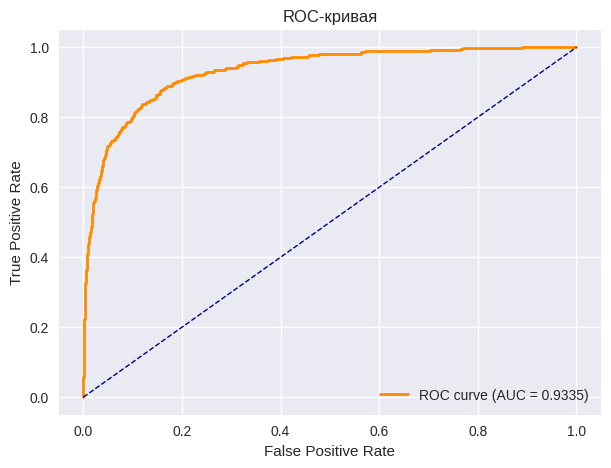

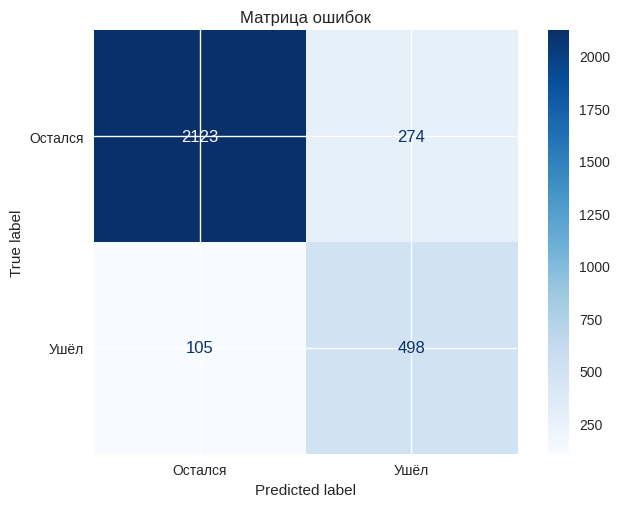

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Размер train: {X_train.shape}, test: {X_test.shape}")

neg, pos = np.bincount(y_train.astype(int))
scale_pos_weight = neg / pos
print(f"Соотношение классов (neg/pos): {scale_pos_weight:.2f}")
#Запускаем функцию ,которая будет обучать CatBoost с разными возможными параметрами и искать наилучшую с точки зрения ROC-AUC
def objective(trial):
    params = {
        'iterations': 100,
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_seed': 42,
        'scale_pos_weight': scale_pos_weight,
        'verbose': 200
    }
    #Делим выборку на 5 бакетов, чтобы провести кросс-валидацию
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = CatBoostClassifier(**params)
        model.fit(X_tr, y_tr, eval_set=(X_val, y_val),
                  early_stopping_rounds=50, verbose=0)

        preds = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, preds)
        aucs.append(auc)

    mean_auc = np.mean(aucs)
    return mean_auc

#Выводим полученный результат
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25, show_progress_bar=True)

print("\nЛучшие параметры:")
print(study.best_params)
print(f"Лучший ROC-AUC (CV): {study.best_value:.4f}")

#Обучаем модель с лучшими гиперпараметрами
best_params = study.best_params
best_params.update({
    'iterations': 1500,
    'random_seed': 42,
    'scale_pos_weight': scale_pos_weight,
    'verbose': 200
})

model_opt_cross = CatBoostClassifier(**best_params)
model_opt_cross.fit(X_train, y_train)


y_pred_proba = model_opt_cross.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)
#Считаем метрики качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nМетрики модели:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

#Считаем AUC и строим кривую ROC и визуализируем результаты
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Остался', 'Ушёл'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.show()


А теперь построим усиленный ансамбль моделей с вложенной кросс-валидацией, чтобы получить максимально устойчивое качество.

Scale positive weight: 3.97

Outer Fold 1/5
Training base model lgbm1...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[815]	valid_0's binary_logloss: 0.291721
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[753]	valid_0's binary_logloss: 0.296839
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[628]	valid_0's binary_logloss: 0.300422
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[702]	valid_0's binary_logloss: 0.285574
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[652]	valid_0's binary_logloss: 0.272069
Training base model lgbm2...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[347]	valid_0's binary_logloss: 0.289487
Training until validation scores don't improve for 50 rounds
Early stopping,

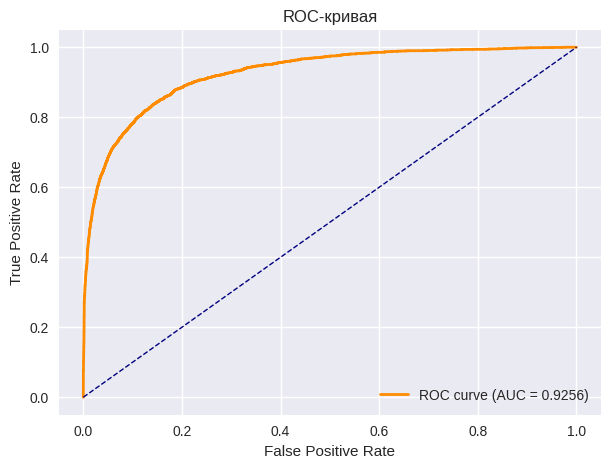

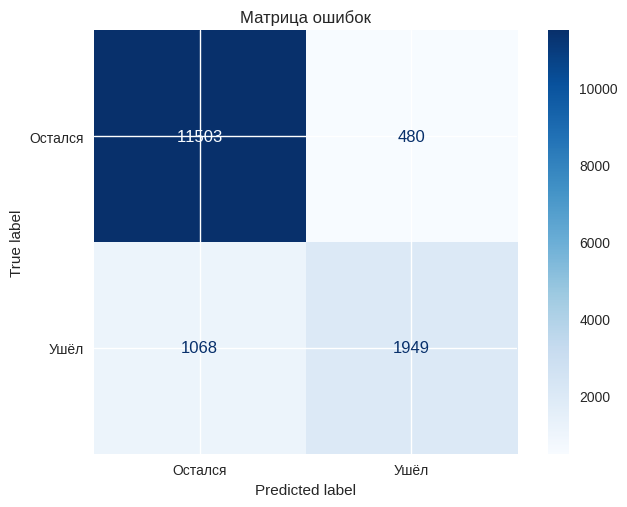

In [ ]:

scale_pos_weight = (y == 0).sum() / (y == 1).sum()
print(f"Scale positive weight: {scale_pos_weight:.2f}")

#Определяем параметры для GPU
lgbm_params = {'device': 'gpu', 'gpu_platform_id': 0, 'gpu_device_id': 0}
xgb_params = {'tree_method': 'gpu_hist', 'gpu_id': 0}
catboost_params = {'task_type': 'GPU', 'devices': ['0:0']}

base_models = {
    'lgbm1': lgb.LGBMClassifier(
        n_estimators=2500, learning_rate=0.015, num_leaves=95, max_depth=9,
        subsample=0.8, colsample_bytree=0.7, reg_alpha=0.1, reg_lambda=0.1,
        random_state=42, class_weight='balanced', verbose=-1, **lgbm_params
    ),
    'lgbm2': lgb.LGBMClassifier(
        n_estimators=2200, learning_rate=0.02, num_leaves=120, max_depth=11,
        subsample=0.75, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.2,
        random_state=11, class_weight={0: 1, 1: scale_pos_weight*0.95}, verbose=-1, **lgbm_params
    ),
    'xgb1': xgb.XGBClassifier(
        n_estimators=2800, learning_rate=0.015, max_depth=7,
        scale_pos_weight=scale_pos_weight*1.05,
        random_state=42, verbosity=0,
        subsample=0.8, colsample_bytree=0.8, **xgb_params
    ),
    'cat1': CatBoostClassifier(
        iterations=2500,
        learning_rate=0.015,
        depth=8,
        l2_leaf_reg=5,
        random_seed=42,
        auto_class_weights='Balanced',
        verbose=0,
        subsample=0.8,
        bootstrap_type='Bernoulli',
        **catboost_params
    ),
    'rf': RandomForestClassifier(
        n_estimators=700, max_depth=14, min_samples_leaf=18,
        class_weight='balanced_subsample', random_state=42, n_jobs=-1
    ),
    'hgb': HistGradientBoostingClassifier(
        max_iter=1200, learning_rate=0.02, max_depth=9,
        l2_regularization=0.8,
        class_weight='balanced', random_state=42
    ),
    'cat2': CatBoostClassifier(
        iterations=2200,
        learning_rate=0.02,
        depth=7,
        l2_leaf_reg=7,
        random_seed=11,
        auto_class_weights='Balanced',
        verbose=0,
        bootstrap_type='Bernoulli',
        **catboost_params
    )
}

NFOLDS_OUTER = 5
NFOLDS_INNER = 5
skf_outer = StratifiedKFold(n_splits=NFOLDS_OUTER, shuffle=True, random_state=42)

oof_preds = np.zeros(len(X_feat))
test_preds = np.zeros(len(test_feat))

for outer_fold, (outer_train_idx, outer_val_idx) in enumerate(skf_outer.split(X_feat, y)):
    print(f"\nOuter Fold {outer_fold + 1}/{NFOLDS_OUTER}")

    #Проверяем уникальность признаков
    assert len(X_feat.columns) == len(set(X_feat.columns)), "Duplicate features detected"

    X_train_outer, y_train_outer = X_feat.iloc[outer_train_idx], y.iloc[outer_train_idx]
    X_valid_outer, y_valid_outer = X_feat.iloc[outer_val_idx], y.iloc[outer_val_idx]

    skf_inner = StratifiedKFold(n_splits=NFOLDS_INNER, shuffle=True, random_state=42)

    def get_oof(model, X_train, y_train):
        oof = np.zeros(len(X_train))
        for inner_train_idx, inner_val_idx in skf_inner.split(X_train, y_train):
            X_tr, y_tr = X_train.iloc[inner_train_idx], y_train.iloc[inner_train_idx]
            X_val, y_val = X_train.iloc[inner_val_idx], y_train.iloc[inner_val_idx]

            if isinstance(model, CatBoostClassifier):
                model.fit(X_tr, y_tr, eval_set=(X_val, y_val), verbose=0, early_stopping_rounds=50)
            elif isinstance(model, lgb.LGBMClassifier):
                model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)],
                          callbacks=[lgb.early_stopping(50)])
            elif isinstance(model, xgb.XGBClassifier):
                model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=0)
            else:
                model.fit(X_tr, y_tr)

            oof[inner_val_idx] = model.predict_proba(X_val)[:, 1]
        return oof

    meta_train = pd.DataFrame(index=outer_train_idx)
    meta_valid = pd.DataFrame(index=outer_val_idx)
    meta_test = pd.DataFrame(index=test_feat.index)

    for name, base_model in base_models.items():
        print(f"Training base model {name}...")
        model = base_model.__class__(**base_model.get_params())
        oof = get_oof(model, X_train_outer, y_train_outer)
        meta_train[name] = oof

        #Финально обучаем модель
        model_final = base_model.__class__(**base_model.get_params())
        model_final.fit(X_train_outer, y_train_outer)

        meta_valid[name] = model_final.predict_proba(X_valid_outer)[:, 1]
        meta_test[name] = model_final.predict_proba(test_feat)[:, 1]

    #Добавляем статистики к мета-признакам
    meta_train['mean_pred'] = meta_train.mean(axis=1)
    meta_train['min_pred'] = meta_train.min(axis=1)
    meta_train['max_pred'] = meta_train.max(axis=1)

    meta_valid['mean_pred'] = meta_valid.mean(axis=1)
    meta_valid['min_pred'] = meta_valid.min(axis=1)
    meta_valid['max_pred'] = meta_valid.max(axis=1)

    meta_test['mean_pred'] = meta_test.mean(axis=1)
    meta_test['min_pred'] = meta_test.min(axis=1)
    meta_test['max_pred'] = meta_test.max(axis=1)

    #Запускаем улучшенную мета-модель
    meta_model = CatBoostClassifier(
        iterations=1500,
        learning_rate=0.025,
        depth=7,
        l2_leaf_reg=3,
        random_seed=42,
        verbose=0,
        task_type='GPU' if catboost_params['task_type'] == 'GPU' else 'CPU'
    )
    meta_model.fit(meta_train, y_train_outer)

    oof_preds[outer_val_idx] = meta_model.predict_proba(meta_valid)[:, 1]
    test_preds += meta_model.predict_proba(meta_test)[:, 1] / NFOLDS_OUTER

    val_auc = roc_auc_score(y_valid_outer, oof_preds[outer_val_idx])
    print(f"Outer fold {outer_fold + 1} meta-model ROC AUC: {val_auc:.5f}")


    del X_train_outer, y_train_outer, X_valid_outer, y_valid_outer, meta_train, meta_valid, meta_test
    gc.collect()
#Считаем метрики качества модели
full_oof_auc = roc_auc_score(y, oof_preds)
y_pred_final = (oof_preds >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred_final)
precision = precision_score(y, y_pred_final)
recall = recall_score(y, y_pred_final)
f1 = f1_score(y, y_pred_final)

print(f"\nFinal metrics: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}, ROC-AUC={full_oof_auc:.4f}")

#Считаем AUC и строим кривую ROC и визуализируем результаты
fpr, tpr, _ = roc_curve(y, oof_preds)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {full_oof_auc:.4f})')
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm = confusion_matrix(y, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Остался', 'Ушёл'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.show()

Первая модель, которую мы построили, - базовый CatBoost на исходных признаках - охватила высокую долю клиентов, которые перестали пользоваться услугами компании (Accuracy = 0.853, Precision = 0.597, Recall = 0.826, F1 = 0.693, ROC-AUC = 0.924).

Далее, при добавлении к модели признаков, созданных в рамках feature engineering, удалось получить прирост качества: Accuracy = 0.874, Precision = 0.645, F1 = 0.724, ROC-AUC = 0.935 при неизменном Recall = 0.826. После этого при использовании подбора гиперпараметров (optuna) удалось еще немного улучшить качество модели в части разделяющей способности и полноты (Accuracy = 0.867, Precision = 0.625, Recall = 0.846, F1 = 0.719, ROC-AUC = 0.936), но это произошло ценой небольшого падения precision и F1 относительно варианта без optuna.

Также был реализован ансамбль моделей, который превзошел предыдущие модели в критерии точности и доле верных предсказаний оттока (Accuracy = 0.896, Precision = 0.797), однако "проиграл" по метрикам полноты и ROC-AUC (Recall = 0.647, F1 = 0.714, ROC-AUC = 0.924).

Таким образом, было 2 модели, из которых мы выбирали: Catboost с применением feature engineering и optuna и ансамбль моделей.



---


С учетом полученных результатов, оптимальным выбором по нашему мнению является CatBoost модель с применением feature engineering и подбором гипермараметров. Такой выбор обусловлен тем, что в данном кейсе более предпочтительно ложное предсказание оттока (больше FP -> ниже Precision), чем ложное предсказание отсутствия оттока (больше FN ->  ниже Recall), также все метрики для данной вариации модели находятся на высоком уровне.


---




Уточним, какие именно признаки, добавленные в рамках feature engineering, помогли улучшить качество модели.
Выведем топ-10 признаков:

In [ ]:
feature_names = X_feat.columns.tolist()
importances = model_opt_cross.get_feature_importance()

imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
top10 = imp.head(10)
print(top10.to_string())

NumOfProducts                                 11.454606
CreditScore_Products                           9.023318
Group_Geography_Gender_Age_bin_Exited_Mean     4.961684
CreditScore                                    4.836703
TE_Geography_Gender_Age_bin                    4.658644
Products_per_Age                               4.293679
Age_IsActive                                   4.290707
Age_NumProducts                                4.122150
Log_Salary_Credit                              3.992187
CreditScore_Age                                3.620134


Можем заметить, что в топ-10 входит 8 признаков, которые были созданы в рамках feature engineering. Высокие позиции взаимодействий признаков (CreditScore×Products, Products_per_Age, Age×NumOfProducts) и нормировок (CreditScore_per_Age) указывают на то, что предсказательная сила определяется не изолированными значениями признаков, а их контекстом: возраст и количество продуктов модерирует влияние кредитного рейтинга. Признак Age_IsActive подчёркивает значимость поведенческого компонента: эффект активности клиента варьируется между возрастными когортами и связан с тем, останется ли пользователь услуг клиентом или нет. Показатель Log_Salary_Credit отражает платежеспособность в паре с кредитным рейтингом: клиенты с различными сочетаниями этих двух признаков имею разную склонность к оттоку, т.к., например, высокий доход и высокий кредитный рейтинг, скорее всего, будут удерживтаь клиента, в то время как высокий доход и низкий кредитный рейтинг будут стимулировать клиента перейти в другой банк. Наконец, присутствие в топе таргет-кодированных и агрегированных групповых признаков (TE_Geography_Gender_Age_bin, Group_Geography_Gender_Age_bin_Exited_Mean) подтверждает устойчивые когортные различия по географии, полу и возрасту, которые используются моделью для предсказания. При этом важно учитывать, что метрики важности бустинговых моделей отражают вклад признаков в качество, но не задают направление эффекта.

# **Юнит-экономика**

Теперь пробуем расчитать юнит-экономику для нашего кейса

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/train.csv')
df = pd.read_csv(train_file)

#1. Общие метрики
total_customers = len(df)
exited_customers = df['Exited'].sum()
active_customers = total_customers - exited_customers

#2. Базовые показатели
total_customers = len(df)
exited_customers = df['Exited'].sum()
churn_rate = exited_customers / total_customers
retention_rate = 1 - churn_rate
avg_balance = df['Balance'].mean()
avg_products = df['NumOfProducts'].mean()
avg_tenure = df['Tenure'].mean()
avg_salary = df['EstimatedSalary'].mean()

# 3. Расчёт примерного дохода и ARPU
# Предполагаем, что клиент приносит банку:
#  - 1% от баланса
#  - 100 у.е. за каждый продукт
df['EstimatedRevenue'] = df['Balance'] * 0.01 + df['NumOfProducts'] * 100
arpu = df['EstimatedRevenue'].mean()
gross_margin = 0.4
ltv = arpu * avg_tenure * gross_margin

CAC = 350  # например, 350 евро
roi = (ltv - CAC) / CAC

# 4. Итоговая таблица метрик
unit_economics = {
    "Всего клиентов": total_customers,
    "Ушедших клиентов": int(exited_customers),
    "Churn rate": round(churn_rate, 3),
    "Retention rate": round(retention_rate, 3),
    "Средний баланс": round(avg_balance, 2),
    "Среднее число продуктов": round(avg_products, 2),
    "Средний срок обслуживания (лет)": round(avg_tenure, 2),
    "Средняя зарплата (оценка)": round(avg_salary, 2),
    "ARPU (оценка)": round(arpu, 2),
    "LTV (оценка)": round(ltv, 2)
}

# 5. Вывод результатов
print("\n--- Юнит-экономика ---")
print(f"Всего клиентов: {total_customers}")
print(f"Churn rate: {churn_rate:.2%}")
print(f"Средний баланс: {avg_balance:.2f}")
print(f"ARPU: {arpu:.2f}")
print(f"LTV: {ltv:.2f}")
print(f"CAC: {CAC:.2f}")
print(f"ROI: {roi:.2%}")



--- Юнит-экономика ---
Всего клиентов: 15000
Churn rate: 20.11%
Средний баланс: 42636.17
ARPU: 584.94
LTV: 1177.08
CAC: 350.00
ROI: 236.31%


# **Основные выводы**

1. **Кредитный рейтинг и баланс менее информативны**. Корреляция между CreditScore,
Balance и оттоком крайне низкая, важнее фокусироваться на поведенческих и демографических признаках.


2. **Риск оттока выше для отдельных сегментов**:

*   Клиенты из Германии демонстрируют заметно больший процент оттока по сравнению с Францией и Испанией. Это связано с региональными особенностями и, возможно, продуктовой политикой банка.

*   Владельцы только одного банковского продукта гораздо чаще уходят, чем клиенты с несколькими продуктами. Т.е. лояльность выше у клиентов, использующих несколько сервисов одновременно.

*   Возраст также коррелирует с вероятностью оттока: более высокая вероятность ухода среди клиентов среднего возраста, особенно в возрасте 40–50 лет.


3. **Модель CatBoost с продвинутым feature engineering даёт сбалансированную производительность по ключевым метрикам** (Recall, Precision, ROC-AUC). Подбор гиперпараметров (Optuna) позволяет увеличить полноту (Recall) до 0.846, что важно: такие модели "ловят" максимальное число реально уходящих клиентов.

4. **Ансамбли моделей усиливают Precision, но теряют Recall**. Такой подход может быть полезен, если банк ориентирован на снижение издержек от неверных обращений к лояльным клиентам. Однако приоритетнее минимизировать пропуски уходящих (FN), а не минимизировать ложные срабатывания (FP).

5. **Класс целевой переменной сильно несбалансирован - 80:20 %**. Метрики должны акцентироваться в первую очередь на Recall (и F1), а не на Accuracy!

# **Рекомендации для бизнеса**

1. **Сфокусировать удержание на следующих сегментах:**

*   Клиенты из Германии;

*   Клиенты, имеющие 1 продукт;

*   Клиенты среднего возраста (40–50 лет).

  Для этих групп запускать кросс-продажи, персонализированные предложения, улучшать клиентский опыт (например, поддержка, бонусы и т.д.).

2. **Использовать рекомендованные модели (модель CatBoost с применением feature engineering и подбором гипермараметров)** в скрининге клиентской базы.
Модель показывает высокую полноту и позволит банку выявить до 85% клиентов с реальным риском ухода.

3. **Автоматизировать работу с моделью**:

*   Внедрить триггерные сценарии/уведомления для CRM — запускать процессы удержания для всех клиентов с вероятностью оттока выше выбранного порога (например, 0.5).

*   Регулярно переобучать модель, чтобы адаптироваться к изменяющемуся поведению клиентов.

4. **Оценивать экономический эффект внедрения модели.**

Сравнить стоимость удержания с потенциальными потерями при уходе выявленных клиентов. Особое внимание уделить чувствительным сегментам "high-value customers".